In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv('/content/fraudTrain.csv')
df_train.head(3)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0


In [3]:
df_test = pd.read_csv('/content/fraudTest.csv')
df_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0


In [4]:
print(f"The shape of train set: {df_train.shape}")
print(f"Test shape of test set: {df_test.shape}")

The shape of train set: (62256, 23)
Test shape of test set: (66115, 23)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62256 entries, 0 to 62255
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             62256 non-null  int64  
 1   trans_date_trans_time  62256 non-null  object 
 2   cc_num                 62256 non-null  int64  
 3   merchant               62256 non-null  object 
 4   category               62256 non-null  object 
 5   amt                    62256 non-null  float64
 6   first                  62256 non-null  object 
 7   last                   62256 non-null  object 
 8   gender                 62256 non-null  object 
 9   street                 62256 non-null  object 
 10  city                   62256 non-null  object 
 11  state                  62256 non-null  object 
 12  zip                    62256 non-null  int64  
 13  lat                    62256 non-null  float64
 14  long                   62256 non-null  float64
 15  ci

In [6]:
df_train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66115 entries, 0 to 66114
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             66115 non-null  int64  
 1   trans_date_trans_time  66115 non-null  object 
 2   cc_num                 66115 non-null  int64  
 3   merchant               66115 non-null  object 
 4   category               66115 non-null  object 
 5   amt                    66115 non-null  float64
 6   first                  66115 non-null  object 
 7   last                   66115 non-null  object 
 8   gender                 66115 non-null  object 
 9   street                 66115 non-null  object 
 10  city                   66115 non-null  object 
 11  state                  66115 non-null  object 
 12  zip                    66114 non-null  float64
 13  lat                    66114 non-null  float64
 14  long                   66114 non-null  float64
 15  ci

In [8]:
df_test.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [9]:
def clean_data(clean):
    # Get the list of columns to drop
    cols_to_drop = ["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time']

    # Get the columns that actually exist in the DataFrame
    existing_cols = [col for col in cols_to_drop if col in clean.columns]

    # Drop only the existing columns
    clean.drop(existing_cols, axis=1, inplace=True)

    # The original code had this line:
    # clean.dropna()
    # Changed to this to drop NaNs inplace:
    clean.dropna(inplace=True)
    return clean

In [10]:
clean_data(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62250,"fraud_Reinger, Weissnat and Strosin",food_dining,8.30,M,39.3764,-76.7290,33917,Company secretary,1.328486e+09,39.184423,-76.458794,0.0
62251,"fraud_Schiller, Blanda and Johnson",home,53.37,M,37.7681,-75.6664,776,Psychiatrist,1.328486e+09,38.614949,-75.269499,0.0
62252,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,40.56,F,38.8938,-86.5246,1228,Counsellor,1.328486e+09,39.665993,-86.739559,0.0
62253,"fraud_Raynor, Feest and Miller",gas_transport,81.50,M,40.5046,-77.7186,4653,Nutritional therapist,1.328487e+09,40.871729,-78.688515,0.0


In [11]:
clean_data(df_test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66109,"fraud_Cormier, Stracke and Thiel",entertainment,12.76,F,41.1762,-79.1976,1274.0,Maintenance engineer,1.373759e+09,41.955060,-79.615469,0.0
66110,fraud_Hirthe-Beier,health_fitness,153.02,F,48.4786,-122.3345,14871.0,Public house manager,1.373759e+09,49.042079,-122.345279,0.0
66111,fraud_Eichmann-Kilback,home,12.21,F,46.1838,-101.2589,77.0,Film/video editor,1.373759e+09,46.879255,-100.824101,0.0
66112,fraud_O'Connell-Ullrich,home,17.35,F,42.3496,-73.5873,4015.0,Human resources officer,1.373759e+09,42.592260,-73.604839,0.0


In [12]:
df_train.select_dtypes(include = ['object'])

,merchant,category,gender,job
0,"fraud_Rippin, Kub and Mann",misc_net,F,"Psychologist, counselling"
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,Special educational needs teacher
2,fraud_Lind-Buckridge,entertainment,M,Nature conservation officer
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,Patent attorney
4,fraud_Keeling-Crist,misc_pos,M,Dance movement psychotherapist
...,...,...,...,...
62250,"fraud_Reinger, Weissnat and Strosin",food_dining,M,Company secretary
62251,"fraud_Schiller, Blanda and Johnson",home,M,Psychiatrist
62252,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,F,Counsellor
62253,"fraud_Raynor, Feest and Miller",gas_transport,M,Nutritional therapist


In [13]:
encoder=LabelEncoder()
def encode(data):
    data['merchant']=encoder.fit_transform(data['merchant'])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [14]:
encode(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,357,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149,412,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154,295,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939,316,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99,111,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62250,509,1,8.30,1,39.3764,-76.7290,33917,97,1.328486e+09,39.184423,-76.458794,0.0
62251,552,6,53.37,1,37.7681,-75.6664,776,355,1.328486e+09,38.614949,-75.269499,0.0
62252,153,2,40.56,0,38.8938,-86.5246,1228,108,1.328486e+09,39.665993,-86.739559,0.0
62253,497,2,81.50,1,40.5046,-77.7186,4653,301,1.328487e+09,40.871729,-78.688515,0.0


In [15]:
encode(df_test)


,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497.0,275,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302.0,391,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496.0,259,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767.0,406,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126.0,196,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66109,106,0,12.76,0,41.1762,-79.1976,1274.0,267,1.373759e+09,41.955060,-79.615469,0.0
66110,260,5,153.02,0,48.4786,-122.3345,14871.0,363,1.373759e+09,49.042079,-122.345279,0.0
66111,155,6,12.21,0,46.1838,-101.2589,77.0,186,1.373759e+09,46.879255,-100.824101,0.0
66112,457,6,17.35,0,42.3496,-73.5873,4015.0,225,1.373759e+09,42.592260,-73.604839,0.0


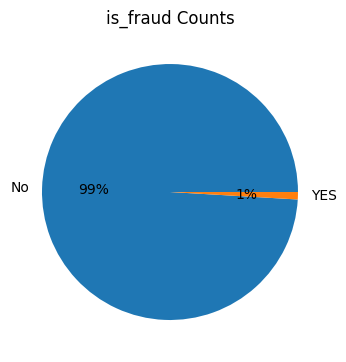

In [16]:
from matplotlib import pyplot as plt
exit_counts = df_train["is_fraud"].value_counts()
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()
plt.show()

<Axes: >

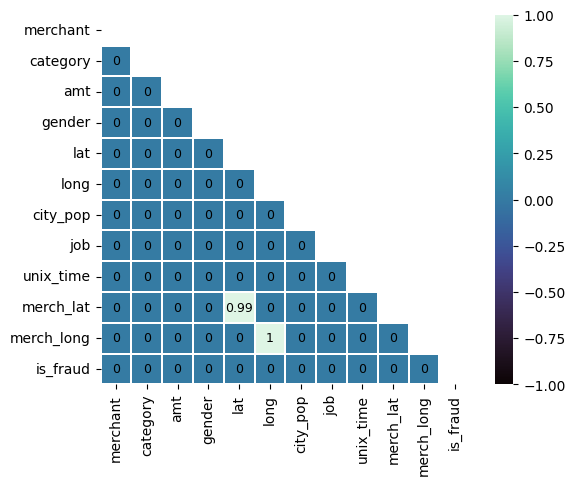

In [17]:
import seaborn as sns
pd.options.display.float_format = "{:,.2f}".format

corr_matrix = df_train.corr(method = 'pearson')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

cmap = "mako"

sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [18]:
x=df_train.drop(columns=['is_fraud'])
y=df_train['is_fraud']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

In [22]:
from sklearn.metrics import accuracy_score
def acc_score(test, pred):
    acc_ = accuracy_score(test, pred)
    return acc_
def print_score(test, pred, model):

    print(f"Classifier: {model}")
    print(f"ACCURACY: {accuracy_score(test, pred)}")

In [23]:
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
print_score(y_test, y_pred, "Logistic Regression")

Classifier: Logistic Regression
ACCURACY: 0.9898000160629669


In [24]:
model_list = []
acc_list = []

model_list.append(model1.__class__.__name__)
acc_list.append(round(acc_score(y_test, y_pred), 4))

In [26]:
model2.fit(x_train,y_train)
y_pred1 = model2.predict(x_test)
print_score(y_test,y_pred1,"Random Forest")

Classifier: Random Forest
ACCURACY: 0.9962252027949562


In [27]:
model_list.append(model2.__class__.__name__)
acc_list.append(round(acc_score(y_test, y_pred), 4))

In [28]:
model3.fit(x_train,y_train)

DecisionTreeClassifier
DecisionTreeClassifier()
Y_Pred = model3.predict(x_test)

In [29]:
print_score(y_test, Y_Pred, "Decision Tree")

Classifier: Decision Tree
ACCURACY: 0.9930126094289615


In [30]:
model_list.append(model3.__class__.__name__)
acc_list.append(round(acc_score(y_test, Y_Pred), 3))

In [31]:
model_results = pd.DataFrame({"Model": model_list,
                              "Accuracy_Score": acc_list,
                              })

In [32]:
model_results

,Model,Accuracy_Score
0,LogisticRegression,0.99
1,RandomForestClassifier,0.99
2,DecisionTreeClassifier,0.99
